<a href="https://colab.research.google.com/github/uwaselari/Clustering-Exercise/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Data Set Information:**
This dataset consists of anonymized information about users’ social media activity. The purpose is to segment users into behavioral clusters using unsupervised learning (K-Means). Each row represents a unique user.

The clustering process groups users based on their engagement metrics such as follower count, content activity, and audience interaction. These clusters can help identify different user types (e.g., influencers, passive users, or regular contributors).

**Predicted attribute: Cluster label indicating type of social media user.**


**Attribute Information:**

*   followers: Number of followers the user has
*   posts_made: Number of posts published by the user
*   likes_received: Total number of likes received across all posts
*   cluster: Cluster group assigned by the K-Means algorithm (e.g., Cluster 0, 1, 2)

### **Task 1: Data Loading and Preparation:**

In [1]:
#Import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
#Import the required libraries for k means

import sklearn.metrics as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.utils import Bunch
from sklearn.metrics import silhouette_score

In [78]:
#Load the dataset

df = pd.read_csv("/content/social_media_users.csv")

# Select relevant numeric columns for clustering (which is all the columns in this dataset)
X = df[['followers', 'posts_made', 'likes_received']]

# Standardize features (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to dataset
social_dataset = Bunch(
    data=X_scaled,
    feature_names=X.columns.tolist(),
    target=None,  # I'll set the target after K-Means
    target_names=None,  # 'Cluster 0', 'Cluster 1', 'Cluster 2'
    DESCR="Social Media Users Dataset (standardized)"
)


In [76]:
#Look at the dataset
social_dataset.data[:5]

array([[-0.86659857, -0.46110131, -0.78465376],
       [-0.36978077,  1.57893722,  1.80293683],
       [ 1.33110534, -0.86133309, -0.61712205],
       [ 1.81273267, -0.87962939, -0.80013989],
       [-0.40150205,  1.41884451,  1.16378224]])

In [21]:
#Look at the features of the dataset
social_dataset.feature_names


['followers', 'posts_made', 'likes_received']

In [74]:
# Assign the predicted cluster labels to mimic a target variable, similar to sklearn's dataset structure
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

social_dataset.target = clusters
social_dataset.target_names = [f"Cluster {i}" for i in range(3)]

print(social_dataset.target_names)


['Cluster 0', 'Cluster 1', 'Cluster 2']


In [28]:
social_dataset.target

array([2, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 1, 2, 2, 2,
       1, 0, 0, 1, 2, 2, 1, 1, 2, 2, 2, 0, 2, 1, 0, 0, 2, 1, 0, 1, 2, 1,
       2, 2, 0, 2, 2, 1, 2, 0, 0, 1, 2, 2, 2, 1, 1, 1, 1, 2, 0, 1, 2, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 2, 1, 2, 2, 1, 2, 0, 2, 2, 1, 0, 2, 0,
       0, 2, 1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2,
       0, 0, 2, 1, 1, 2, 2, 2, 0, 2, 1, 0, 0, 2, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 2, 0, 1, 0, 2, 0, 1, 2, 1, 2, 1,
       0, 1, 1, 2, 1, 1, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0, 1, 2, 1, 2, 2, 2,
       2, 2, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1,
       0, 2], dtype=int32)

In [29]:
#Load the dataframe, the x values

x = pd.DataFrame(social_dataset.data,columns=social_dataset.feature_names)

In [30]:
#Look for any Null values

x.isnull().sum()

,0
followers,0
posts_made,0
likes_received,0


In [31]:
#Look at the max and min values to see if any normalization required

x.max()

,0
followers,1.889132
posts_made,1.910558
likes_received,2.081687


In [32]:
#Look at the max and min values to see if any normalization required

x.min()

,0
followers,-0.872407
posts_made,-1.080889
likes_received,-0.815626


In [33]:
x.head()

,followers,posts_made,likes_received
0,-0.866599,-0.461101,-0.784654
1,-0.369781,1.578937,1.802937
2,1.331105,-0.861333,-0.617122
3,1.812733,-0.879629,-0.800140
4,-0.401502,1.418845,1.163782


In [34]:
#Load the dataframe, the y values

y = pd.DataFrame(social_dataset.target,columns=['Targets'])

In [35]:
y

,Targets
0,2
1,1
2,0
3,0
4,1
...,...
195,0
196,1
197,1
198,0


### **Task 2: Determine Optimal K :**

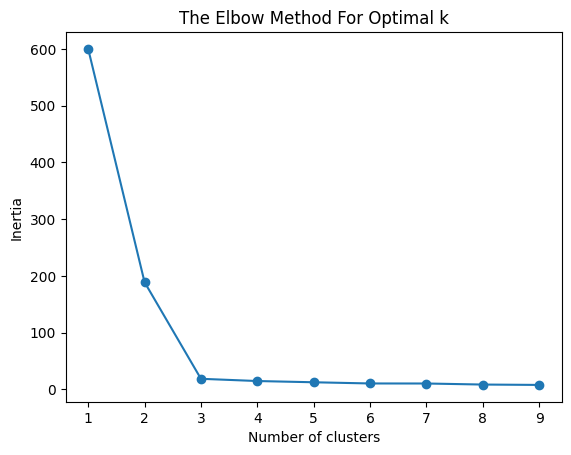

In [72]:
# Building the elbow graph for the k value

inertia = []
for i in range(1, 10):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    inertia.append(km.inertia_)

# plotting the graph

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method For Optimal k')
plt.show()

K=2, Silhouette Score=0.6841
K=3, Silhouette Score=0.8699
K=4, Silhouette Score=0.7100
K=5, Silhouette Score=0.6973
K=6, Silhouette Score=0.5265
K=7, Silhouette Score=0.3467
K=8, Silhouette Score=0.5278
K=9, Silhouette Score=0.5222
K=10, Silhouette Score=0.4782


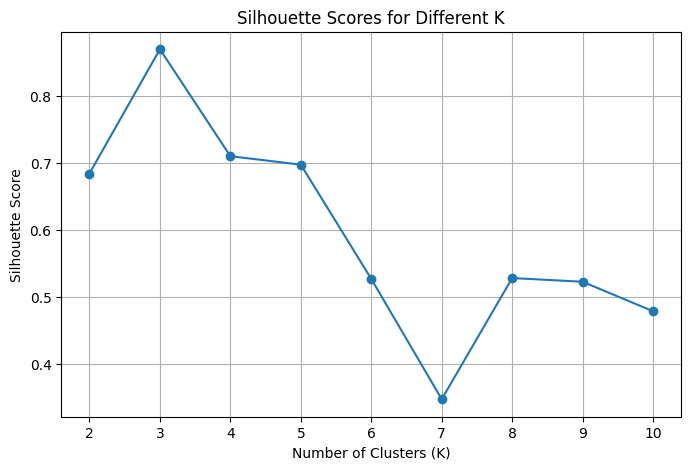

In [73]:
# List to store silhouette scores
silhouette_scores = []

# K values from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(x)  # `x` is the normalized feature matrix
    labels = kmeans.labels_
    score = silhouette_score(x, labels)
    silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score={score:.4f}")

# Plotting the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

### **Task 3: Build and Apply the Final Model:**

In [37]:
#Model fitting

model=KMeans(n_clusters=3)
model.fit(x)

KMeans(n_clusters=3)

In [65]:
# Add cluster labels to original DataFrame
df['cluster'] = model.labels_
# View the result
print(df.head())

   followers  posts_made  likes_received  cluster
0         13         271              43        1
1       1125        1163            1881        0
2       4932          96             162        2
3       6010          88              32        2
4       1054        1093            1427        0


### **Task 4: Visualize and Analyze Clusters:**

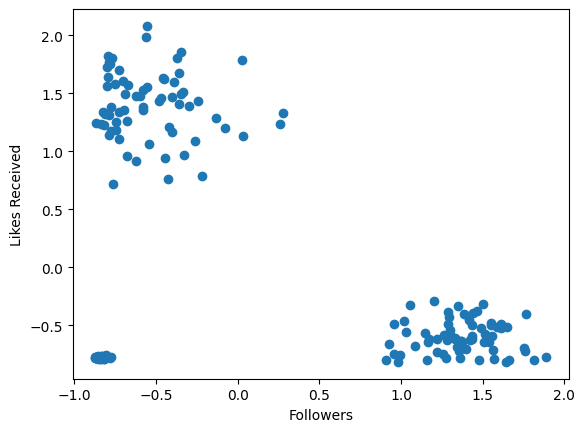

In [79]:
#Create a scatter plot to visualize the clusters (e.g., followers vs. likes_received)
plt.scatter(x.followers, x.likes_received)
plt.xlabel('Followers')
plt.ylabel('Likes Received')
plt.show()



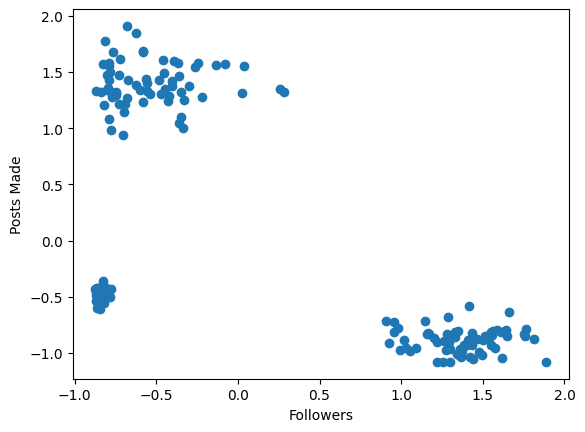

In [77]:
#Create a scatter plot to visualize the clusters (e.g., followers vs. posts_made)
plt.scatter(x.followers, x.posts_made)
plt.xlabel('Followers')
plt.ylabel('Posts Made')
plt.show()

In [43]:
#Creating an array of different colours for different clusters

colormap=np.array(['Red','green','blue'])

In [44]:
#To get the centroids of the clusters

model.cluster_centers_

array([[-0.53623288,  1.3922317 ,  1.39609544],
       [-0.84096548, -0.48062648, -0.77696323],
       [ 1.36919488, -0.89082564, -0.59829496]])

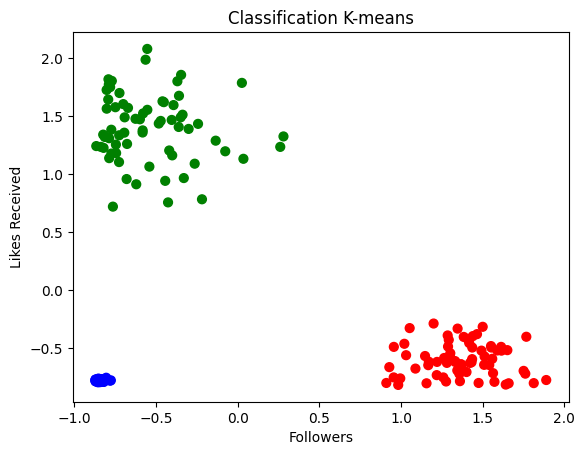

In [70]:
#Visualisation of the clusters followers vs. likes_received

plt.scatter(x.followers, x.likes_received,c=colormap[y.Targets],s=40)
plt.title('Classification K-means')
plt.xlabel('Followers')
plt.ylabel('Likes Received')
plt.show()


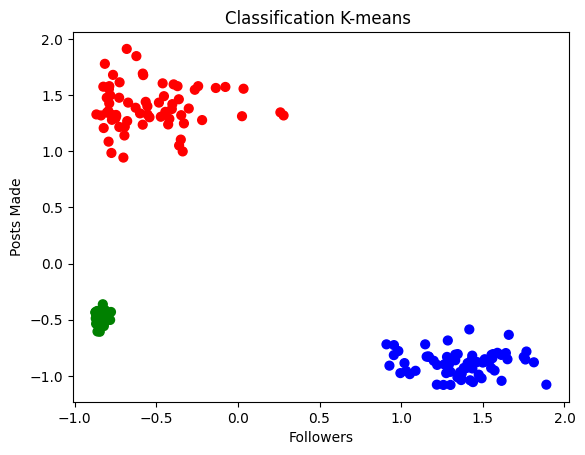

In [75]:
#Visualisation of the clusters followers vs. post_made

plt.scatter(x.followers, x.posts_made,c=colormap[model.labels_],s=40)
plt.title('Classification K-means ')
plt.xlabel('Followers')
plt.ylabel('Posts Made')
plt.show()

In [71]:
# Group by 'cluster' and calculate mean for each feature
cluster_summary = df.groupby('cluster').mean()

# Print the summary table
print(cluster_summary)


           followers   posts_made  likes_received
cluster                                          
0         752.439394  1081.363636     1592.015152
1          70.373134   262.462687       48.462687
2        5017.253731    83.104478      175.373134
